In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report)


In [5]:
data = pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9694357641936729


Confusion Matrix:
 [[55135  1729]
 [   12    86]]


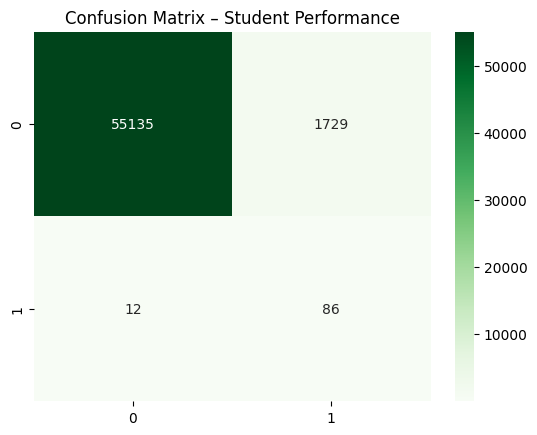

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Student Performance")
plt.show()


In [10]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.047382920110192836


In [11]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8775510204081632


In [12]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.08991113434396236


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [14]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9165621985288207


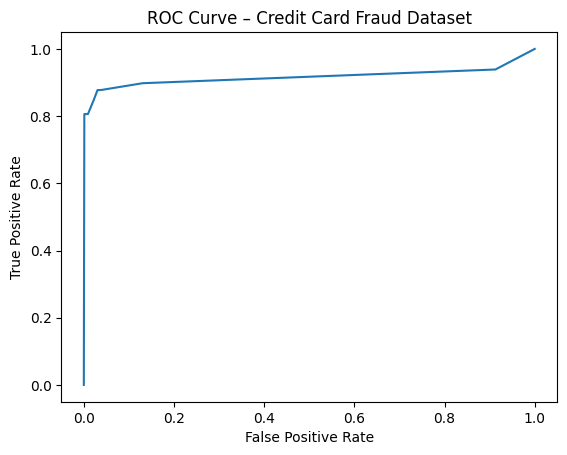

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Credit Card Fraud Dataset")
plt.show()

In [16]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())

Cross-validation F1 scores: [0.00351343 0.12008578 0.11379801 0.0608547  0.01384083]
Mean CV F1 Score: 0.06241854890003077
